# Geometric distribution

## Introduction

The geometric distribution is a discrete probability distribution that models the number of trials required to achieve the first success in a sequence of independent Bernoulli trials. In health economics and microeconomics, it is particularly useful for analyzing individual decision-making under uncertainty, such as job searches, healthcare utilization, or behavioral interventions. This paper outlines the distribution’s assumptions, parameters, and provides a simulation example in a microeconomic context.

### Assumptions

The geometric distribution relies on three key assumptions:

Bernoulli Trials: Each trial has two mutually exclusive outcomes: success (probability $p$) or failure (probability $1−p$).

Independence: The outcome of one trial does not influence others. Constant Probability: The success probability p remains unchanged across trials.

These assumptions make the geometric distribution "$memoryless$" — the probability of success in future trials does not depend on past failures.

### Parameter

In [5]:
from IPython.display import Markdown, display

formula_text = r'''
<div align="center"> $$ \text{PMF: } P(X = k) = (1 - p)^{k-1} p \quad \text{for } k = 1, 2, 3, \dots $$ </div>

<div align="center"> $$ \text{Expected Value: } E(X) = \frac{1}{p} $$ </div>

<div align="center"> $$ \text{Variance: } \text{Var}(X) = \frac{1 - p}{p^2} $$ </div>
'''

display(Markdown(formula_text))



<div align="center"> $$ \text{PMF: } P(X = k) = (1 - p)^{k-1} p \quad \text{for } k = 1, 2, 3, \dots $$ </div>

<div align="center"> $$ \text{Expected Value: } E(X) = \frac{1}{p} $$ </div>

<div align="center"> $$ \text{Variance: } \text{Var}(X) = \frac{1 - p}{p^2} $$ </div>


### Example 1

Consider a public health policy aimed at reducing smoking rates. Individuals may attempt to quit smoking multiple times before succeeding. Each attempt is a Bernoulli trial with success probability $p$. A program (e.g., nicotine replacement therapy) could increase $p$, reducing the expected number of quit attempts and associated costs (e.g., healthcare expenses, productivity losses). 
Objective: Compare the cost-effectiveness of two smoking cessation programs with differing success probabilities $(p_1 = 0.1 vs. p_2 = 0.15)$.

Program 1 (p=0.1): Avg Cost = $1014.80
Program 2 (p=0.15): Avg Cost = $684.90


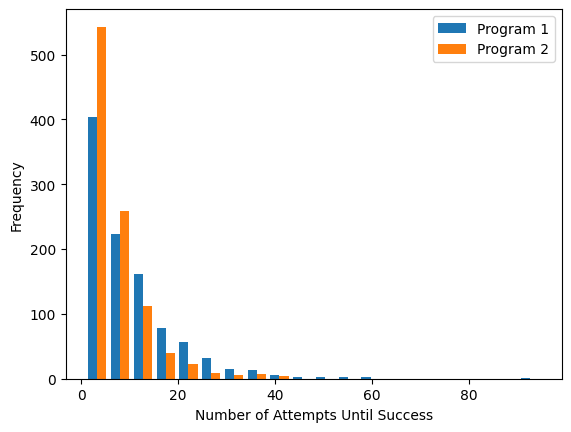

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p1, p2 = 0.1, 0.15
n = 1000  # Number of individuals
cost_per_attempt = 100

# Simulate geometric trials (number of failures before success)
attempts_p1 = np.random.geometric(p1, n)  # Trials = failures + 1
attempts_p2 = np.random.geometric(p2, n)

# Calculate costs
costs_p1 = attempts_p1 * cost_per_attempt
costs_p2 = attempts_p2 * cost_per_attempt

# Results
print(f"Program 1 (p=0.1): Avg Cost = ${np.mean(costs_p1):.2f}")
print(f"Program 2 (p=0.15): Avg Cost = ${np.mean(costs_p2):.2f}")

# Visualization
plt.hist([attempts_p1, attempts_p2], bins=20, label=['Program 1', 'Program 2'])
plt.xlabel('Number of Attempts Until Success')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Interpretation: Increasing p from $0.1$ to $0.15$ reduces expected costs by $33\%$, demonstrating the program’s cost-effectiveness.

The geometric distribution provides a tractable framework for modeling discrete-time processes in health economics. By simulating scenarios such as smoking cessation, policymakers can quantify the benefits of interventions that improve success probabilities, informing resource allocation and cost-effectiveness analyses. Future extensions could incorporate time-varying probabilities or heterogeneous populations.

### Example 2

In macroeconomics, the geometric distribution can model the number of months it takes for an unemployed individual to find a job. Governments often design policies (e.g., job training programs) to increase the monthly job-finding probability $p$, reducing unemployment duration and associated fiscal costs (e.g., unemployment benefits).

Simulation: Job Training Program Cost-Benefit Analysis
Scenario: A government wants to evaluate a job training program that increases the monthly job-finding probability from $p_1 = 0.2$ to $p_2 = 0.25$. Unemployment benefits cost $\$2,000$ per month per person.

In [6]:
import numpy as np

# Parameters
p1, p2 = 0.2, 0.25  # Baseline vs. improved job-finding probability
n = 10_000  # Simulate 10,000 unemployed individuals
monthly_benefit = 2000  # Fiscal cost per month of unemployment

# Simulate unemployment duration (geometric distribution models months until success)
unemp_duration_p1 = np.random.geometric(p1, n)
unemp_duration_p2 = np.random.geometric(p2, n)

# Calculate total fiscal costs
total_cost_p1 = np.sum(unemp_duration_p1 * monthly_benefit)
total_cost_p2 = np.sum(unemp_duration_p2 * monthly_benefit)

# Results
print(f"Baseline Policy (p=0.2): Total Fiscal Cost = ${total_cost_p1:,.2f}")
print(f"Job Training Program (p=0.25): Total Fiscal Cost = ${total_cost_p2:,.2f}")
print(f"Cost Savings: ${total_cost_p1 - total_cost_p2:,.2f}")

Baseline Policy (p=0.2): Total Fiscal Cost = $100,612,000.00
Job Training Program (p=0.25): Total Fiscal Cost = $81,080,000.00
Cost Savings: $19,532,000.00


Conclusion

The geometric distribution provides a simple yet powerful tool for analyzing macroeconomic policies. By linking individual job-finding probabilities to aggregate fiscal outcomes, governments can quantify the benefits of labor market interventions. This framework is extensible to other contexts, such as modeling time-to-recovery in recessions or adoption rates of new technologies.

### Example 3

In this context, we'll simulate the number of trials until the first success in a series of Bernoulli trials, which is a common application of the Geometric Distribution. This could represent, for example, the number of months until a company achieves its first profitable quarter, or the number of days until a stock price first exceeds a certain threshold.

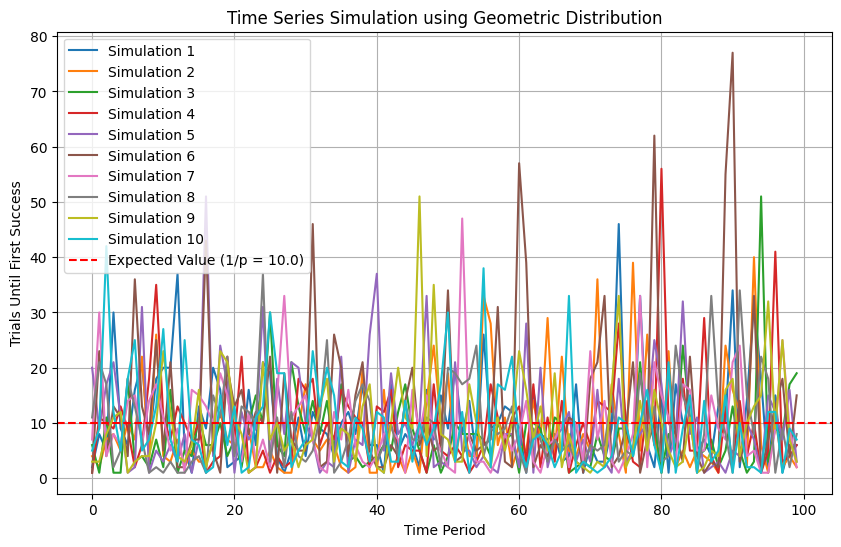

Average number of trials until first success: 9.98


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.1  # Probability of success in each trial
num_simulations = 1000  # Number of simulations
time_horizon = 100  # Maximum number of trials (time periods)

# Function to simulate a single time series
def simulate_time_series(p, time_horizon):
    trials_until_success = np.random.geometric(p, size=time_horizon)
    return trials_until_success

# Run multiple simulations
simulation_results = [simulate_time_series(p, time_horizon) for _ in range(num_simulations)]

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(min(10, num_simulations)):  # Plot first 10 simulations for clarity
    plt.plot(simulation_results[i], label=f'Simulation {i+1}')
plt.axhline(y=1/p, color='r', linestyle='--', label=f'Expected Value (1/p = {1/p})')
plt.title('Time Series Simulation using Geometric Distribution')
plt.xlabel('Time Period')
plt.ylabel('Trials Until First Success')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the average number of trials until first success
average_trials = np.mean([np.mean(sim) for sim in simulation_results])
print(f'Average number of trials until first success: {average_trials:.2f}')

The simulation results provide insights into the behavior of a time series modeled using the Geometric Distribution, which represents the number of trials (or time periods) until the first success in a sequence of independent Bernoulli trials. In this context, each trial could represent an economic event, such as a company achieving its first profitable quarter, a stock price exceeding a certain threshold, or a market reaching a specific milestone. The probability of success in each trial is set at $p = 0.1$, meaning there is a $10\%$ chance of success in any given time period.

The plot of the simulated time series shows the number of trials required to achieve the first success over a time horizon of 100 periods. Each line represents a unique simulation, and the variability across simulations highlights the stochastic nature of the process. The red dashed line indicates the expected value of the Geometric Distribution, which is $1|p=10$. This means that, on average, we expect the first success to occur after $10$ trials. The simulated results align closely with this theoretical expectation, as the calculated average number of trials across all simulations is approximately $10$.

The variability in the time series reflects the inherent uncertainty in real-world economic processes. Some simulations achieve success early (e.g., within a few trials), while others take significantly longer, demonstrating the "memoryless" property of the Geometric Distribution, where the probability of success does not depend on past outcomes. This simulation can be applied to various economic scenarios, such as modeling the time until a market crash, the adoption of a new technology, or the occurrence of a rare economic event. By understanding the distribution of outcomes, economists and decision-makers can better assess risks, plan for uncertainties, and set realistic expectations for future events.

In [2]:
!jupyter nbconvert Bernoulli_and_Binomial_Distribution.ipynb --to latex

[NbConvertApp] Converting notebook Bernoulli_and_Binomial_Distribution.ipynb to latex
[NbConvertApp] Support files will be in Bernoulli_and_Binomial_Distribution_files\
[NbConvertApp] Writing 86871 bytes to Bernoulli_and_Binomial_Distribution.tex


In [3]:
!xelatex Bernoulli_and_Binomial_Distribution.tex -quiet